In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE

In [22]:
train=pd.read_csv(r'D:\Downloads\MessagePolarity_ParticipantsData\MessagePolarity_ParticipantsData\train.csv')
train.head()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,...,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
0,-0.351864,2.620660,1.253645,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,0.079303,0.157385,-0.028751,-0.046474,0.222453,1
1,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,3.837751,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.195476,-0.408024,0
2,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.187634,-0.392578,0
3,1.210190,2.682528,1.291868,-0.039223,0.221744,-0.353977,-0.304257,0.859101,-0.318797,2.374782,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.340723,1.334201,2.270899,0.602985,1
4,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.930461,-0.028751,-0.113133,-0.128592,0


In [23]:
train.IsGoodNews.value_counts()

0    579
1    368
Name: IsGoodNews, dtype: int64

In [24]:
train.describe()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,...,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,...,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.023323,0.039056,0.020516,0.013038,-0.018424,0.002831,-0.006407,0.008428,0.044759,0.005193,...,0.059328,-0.005919,-0.031999,-0.001397,0.033669,0.013292,-0.013279,-0.021817,0.018881,0.388596
std,1.104679,1.085628,1.026794,1.345090,0.890268,0.970823,0.868676,1.136686,1.179691,1.129019,...,1.169027,0.959135,0.643179,0.821608,1.146482,0.860000,0.958807,0.513887,0.997459,0.487689
min,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.219003,-0.427682,0.000000
25%,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.195476,-0.374323,0.000000
50%,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.230681,-0.081172,-0.164107,-0.277435,0.000000
75%,-0.351864,-0.318036,0.326735,-0.039223,0.107252,-0.353977,-0.304257,-0.240708,-0.318797,-0.080193,...,-0.018022,-0.205212,-0.079531,-0.118688,-0.151911,0.145162,-0.054961,-0.038632,-0.039427,1.000000
max,13.771711,11.065546,9.184940,40.442907,8.479498,11.570173,6.461416,25.215295,18.826505,25.078049,...,18.446001,14.997385,13.943676,15.030734,15.146785,15.670854,28.750489,8.419193,12.437402,1.000000


In [25]:
train.loc[train.IsGoodNews==1,'Freq_Of_Word_47'].value_counts()

-0.079531    365
 0.266721      1
 0.439847      1
 1.478603      1
Name: Freq_Of_Word_47, dtype: int64

# Data split

In [26]:
feature=train.iloc[:,:-1]
label=train.copy().pop('IsGoodNews')

# UPsampling

from imblearn.over_sampling import SMOTE
feature,label=SMOTE(sampling_strategy='minority',random_state=88,k_neighbors=5).fit_sample(feature,label)

# Feature generation

In [27]:
# word which are rarely present selected for aggregation.
cat_features=[]
for col in feature.columns:
    if feature[col].map(str).describe(exclude='number')['unique']<=40:
        cat_features.append(col)
cat_features        

['Freq_Of_Word_4',
 'Freq_Of_Word_22',
 'Freq_Of_Word_32',
 'Freq_Of_Word_34',
 'Freq_Of_Word_38',
 'Freq_Of_Word_41',
 'Freq_Of_Word_47',
 'Freq_Of_Word_48',
 'TotalEmojiCharacters']

In [28]:
# NEW FEATURES BY AGGREGATION.
from itertools import combinations
new=pd.DataFrame(index=feature.index)
for col1,col2 in combinations(cat_features,2):
    new[col1+col2]=feature[col1].map(str)+feature[col2].map(str)
    
for col1,col2 in combinations(feature.columns,2):
    new[col1+'3'+col2]=(feature[col1]+feature[col2])**3  
    
for col1,col2,col3 in combinations(cat_features,3):
    new[col1+col2+col3]=feature[col1].map(str)+feature[col2].map(str)+feature[col3].map(str)

In [29]:
feature=feature.join(new)
feature.shape

(947, 1551)

In [30]:
cat_features_=feature.describe(exclude='number').columns

# Count Encoding

In [31]:
#feature_.drop('label',axis=1,inplace=True)
from category_encoders import TargetEncoder,CatBoostEncoder,CountEncoder
te=CountEncoder()
te.fit(feature[cat_features_],label)
feature=feature.join(te.transform(feature[cat_features_]).add_suffix('_t'))

C:\Users\pankaj\Anaconda3\lib\site-packages\category_encoders\count.py:255: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  X.loc[:, self.cols] = X.fillna(value=pd.np.nan)


# Test preprocessing.

In [32]:
test=pd.read_csv(r'D:\Downloads\MessagePolarity_ParticipantsData\MessagePolarity_ParticipantsData\test.csv')

from itertools import combinations
new=pd.DataFrame(index=test.index)
for col1,col2 in combinations(cat_features,2):
    new[col1+col2]=test[col1].map(str)+test[col2].map(str)

for col1,col2 in combinations(test.columns,2):
    new[col1+'3'+col2]=(test[col1]+test[col2])**3 
    
    
for col1,col2,col3 in combinations(cat_features,3):
    new[col1+col2+col3]=test[col1].map(str)+test[col2].map(str)+test[col3].map(str)  
test=test.join(new)    

In [33]:
test=test.join(te.transform(test[cat_features_]).add_suffix('_t'))

In [34]:
# DROPED ALL AGGREGATED ATTRIBUTES EXCEPT ENCODED ONE.
feature.drop(cat_features_,axis=1,inplace=True)

# Baseline model.

In [44]:
from sklearn.model_selection import StratifiedKFold
lgb=LGBMClassifier()
score=[]
for train_ind,test_ind in StratifiedKFold(n_splits=10,shuffle=True,random_state=8).split(feature,label):
    X_train,y_train=feature.loc[train_ind],label.loc[train_ind]
    X_test,y_test=feature.loc[test_ind],label.loc[test_ind]
    lgb.fit(X_train,y_train)
    y_pred_prob=lgb.predict_proba(X_test)[:,1]
    y_pred=[1 if val>=.4 else 0 for val in y_pred_prob]
    score.append(f1_score(y_test,y_pred))

np.array(score).mean()

0.903163626749784

In [45]:
score

[0.8947368421052632,
 0.9428571428571428,
 0.9444444444444445,
 0.8461538461538461,
 0.9315068493150684,
 0.9066666666666667,
 0.9589041095890412,
 0.888888888888889,
 0.8108108108108109,
 0.9066666666666667]

# Feature selection

In [39]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=lgb,n_features_to_select=100,step=50).fit(feature,label)
selected_col1=feature.columns[rfe.support_]
rfe=RFE(estimator=lgb,n_features_to_select=40,step=5).fit(feature[selected_col1],label)
selected_col=feature[selected_col1].columns[rfe.support_]
selected_col

Index(['Freq_Of_Word_33Freq_Of_Word_19', 'Freq_Of_Word_33Freq_Of_Word_50',
       'Freq_Of_Word_53Freq_Of_Word_9', 'Freq_Of_Word_53Freq_Of_Word_16',
       'Freq_Of_Word_53Freq_Of_Word_50', 'Freq_Of_Word_63StylizedLetters',
       'Freq_Of_Word_73Freq_Of_Word_19', 'Freq_Of_Word_73Freq_Of_Word_21',
       'Freq_Of_Word_73LengthOFFirstParagraph',
       'Freq_Of_Word_73StylizedLetters', 'Freq_Of_Word_83StylizedLetters',
       'Freq_Of_Word_103Freq_Of_Word_14', 'Freq_Of_Word_123Freq_Of_Word_17',
       'Freq_Of_Word_123Freq_Of_Word_19', 'Freq_Of_Word_123Freq_Of_Word_37',
       'Freq_Of_Word_123Freq_Of_Word_45',
       'Freq_Of_Word_163LengthOFFirstParagraph',
       'Freq_Of_Word_163StylizedLetters',
       'Freq_Of_Word_183LengthOFFirstParagraph',
       'Freq_Of_Word_183StylizedLetters', 'Freq_Of_Word_193Freq_Of_Word_21',
       'Freq_Of_Word_193Freq_Of_Word_44', 'Freq_Of_Word_193Freq_Of_Word_50',
       'Freq_Of_Word_213Freq_Of_Word_50',
       'Freq_Of_Word_213LengthOFFirstParagraph

# Validation on selected attributes

In [46]:
lgb=LGBMClassifier()
score=[]
for train_ind,test_ind in StratifiedKFold(n_splits=10,shuffle=True,random_state=8).split(feature[selected_col],label):
    X_train,y_train=feature[selected_col].loc[train_ind],label.loc[train_ind]
    X_test,y_test=feature[selected_col].loc[test_ind],label.loc[test_ind]
    lgb.fit(X_train,y_train)
    y_pred_prob=lgb.predict_proba(X_test)[:,1]
    y_pred=[1 if val>=.4 else 0 for val in y_pred_prob]
    score.append(f1_score(y_test,y_pred))

np.array(score).mean()

0.903163626749784

# Tunning

In [40]:
feature=feature[selected_col]

In [41]:
pram={'num_leaves':(15,20,25,30),'max_depth':(10,15),'n_estimators':(100,200),'subsample_for_bin':(500,1000),'subsample':(.8,.6)}
gs=GridSearchCV(estimator=lgb,param_grid=pram,cv=3,n_jobs=-1).fit(feature,label)

In [42]:
gs.best_params_

{'max_depth': 10,
 'n_estimators': 100,
 'num_leaves': 25,
 'subsample': 0.8,
 'subsample_for_bin': 500}

# Final model

In [48]:
lgb=LGBMClassifier(max_depth=10,n_estimators=100,num_leaves=25,subsample=.8,subsample_for_bin=500,colsample_bytree=.6)
score=[]
for train_ind,test_ind in StratifiedKFold(n_splits=10,shuffle=True,random_state=8).split(feature,label):
    X_train,y_train=feature.loc[train_ind],label.loc[train_ind]
    X_test,y_test=feature.loc[test_ind],label.loc[test_ind]
    lgb.fit(X_train,y_train)
    y_pred_prob=lgb.predict_proba(X_test)[:,1]
    y_pred=[1 if val>=.4 else 0 for val in y_pred_prob]
    score.append(f1_score(y_test,y_pred))

np.array(score).mean()

0.9111835504889619

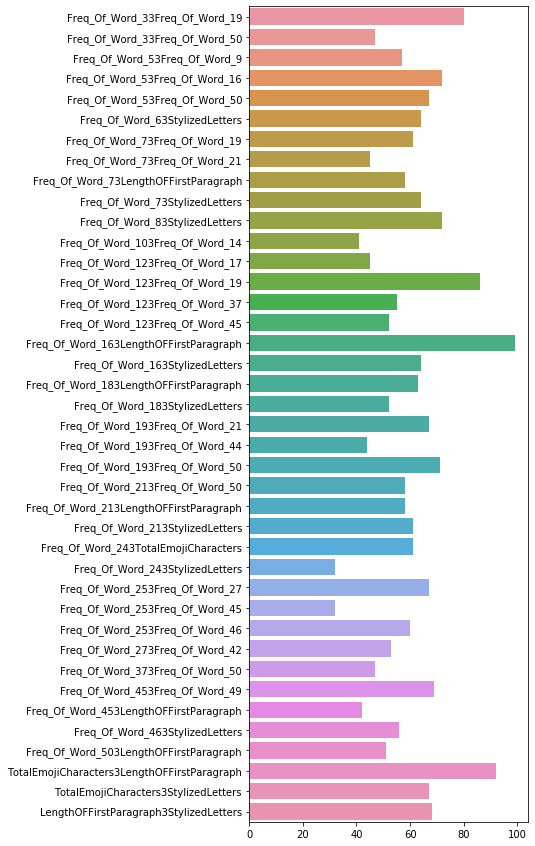

In [53]:
plt.figure(figsize=(5,15))
sns.barplot(y=X_train.columns,x=lgb.feature_importances_)

In [49]:
lgb.fit(feature[selected_col],label)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.6,
               importance_type='split', learning_rate=0.1, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=25, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.8, subsample_for_bin=500, subsample_freq=0)

In [50]:
test.drop(cat_features_,axis=1,inplace=True)

### Final prediction

In [51]:
y_pred_prob=lgb.predict_proba(test[selected_col])[:,1]
y_pred=[1 if val>=.4 else 0 for val in y_pred_prob]
pd.Series(y_pred,name='IsGoodNews').to_excel(r'C:\Users\pankaj\Desktop\polarity.xlsx',index=False)

In [52]:
pd.Series(y_pred).value_counts()

0    327
1    200
dtype: int64